In [17]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import os
os.environ['OMP_NUM_THREADS'] = '2'
import warnings
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r"C:\Users\asus\Documents\auto-mpg.csv")
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [18]:
data['horsepower'] = data['horsepower'].replace('?', np.nan)

# Convert horsepower to numeric
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

# Fill missing values with the mean of the column
data['horsepower'].fillna(data['horsepower'].mean(), inplace=True)

In [19]:

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
df = data[features]

# Handle missing values
df = df.dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [21]:
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

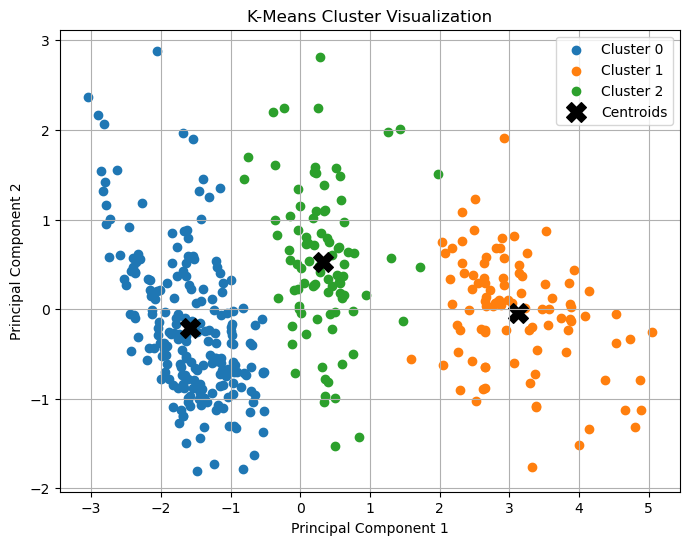

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce the data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_clusters):  # Assuming `optimal_clusters = 3`
    plt.scatter(
        reduced_data[df['Cluster'] == cluster, 0],  # x-coordinates
        reduced_data[df['Cluster'] == cluster, 1],  # y-coordinates
        label=f'Cluster {cluster}'
    )

# Mark cluster centers
centers_reduced = pca.transform(kmeans.cluster_centers_)
plt.scatter(
    centers_reduced[:, 0],
    centers_reduced[:, 1],
    s=200, c='black', marker='X', label='Centroids'
)

plt.title("K-Means Cluster Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()